# Logistische Regression
In diesem Notebook behandeln wir die logistische Regression, mit welcher wir die Stornierungen vorhersagen.
Actually: ... mit welcher wir die Wahrscheinlichkeit vorhersagen, mit welcher ein Filmdatensatz (k)eine Altersbewertung enthält.

## Load Packages

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
import statsmodels.api as sm
import scipy.stats
import scipy.special
import sklearn.linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
#from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
import feature_engine.imputation as imp
from feature_engine.encoding import OneHotEncoder

import matplotlib.pyplot as plt

## Load Data

In [24]:
X_train = pd.read_csv('Xtrain_tvshows_featured.csv')
X_test = pd.read_csv('Xtest_tvshows_featured.csv')
y_train = pd.read_csv('ytrain_tvshows.csv')
y_test = pd.read_csv('ytest_tvshows.csv')
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(y_train.shape))
print("Shape of y Test: {}".format(y_test.shape))

Shape of X Train: (4294, 7)
Shape of X Test: (1074, 7)
Shape of y Train: (4294, 1)
Shape of y Test: (1074, 1)


## Beschreibung abrufen

In [25]:
X_train.describe()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+
count,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000
mean,0.072168,0.705047,0.413937,0.364462,0.300885,0.343735,0.065906
std,0.088740,0.129606,0.217222,0.481335,0.458696,0.475009,0.248146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025641,0.635294,0.288889,0.000000,0.000000,0.000000,0.000000
50%,0.042735,0.729412,0.422222,0.000000,0.000000,0.000000,0.000000
75%,0.085470,0.788235,0.555556,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
X_train.head()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,0.051282,0.600000,0.311111,0,0,1,0
1,0.282051,0.694118,0.700000,0,1,1,0
2,0.042735,0.717647,0.677778,1,0,0,0
3,0.034188,0.670588,0.000000,0,0,1,0
4,0.000000,0.576471,0.466667,0,1,0,0


## Selecting Feature (Tutorial: https://www.datacamp.com/tutorial/understanding-logistic-regression-python) unsicher obs stimmt... --> checce nöd wie die Target variable definiert wird ( label??) Also - where's unsere Age_na Column? :-/ --> Das wäre die Target Variable?

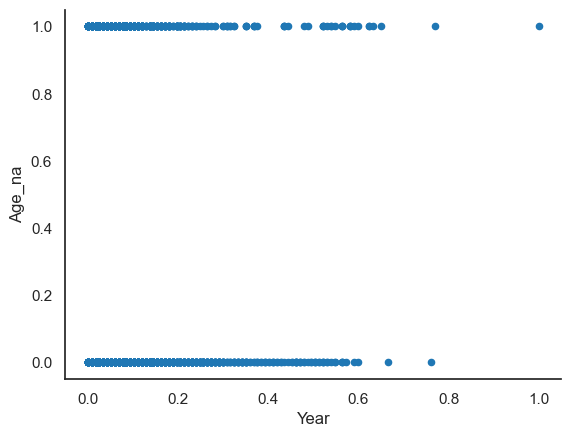

In [27]:
#split dataset in features and target variable
#feature_cols = ['Year', 'IMDb', 'Rotten_Tomatoes', 'Netflix','Hulu','Prime Video','Disney+']
#X = X_train[feature_cols] # Features
#y = y_train # Target variable

tabelle = X_train[['Year', 'IMDb', 'Rotten_Tomatoes', 'Netflix','Hulu','Prime Video','Disney+']]
tabelle = tabelle.join(y_train)
tabelle.head()
tabelle.plot.scatter('Year', 'Age_na')
sns.despine()

## Logistische Regression

In [28]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty=None)

In [29]:
#ke ahnig wasmer hie mache aber it's worth trying
logreg = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
logreg.fit(tabelle['Year'].values.reshape(-1,1), tabelle['Age_na'])
print(logreg.intercept_, logreg.coef_)

[-0.24051924] [[-2.31928617]]


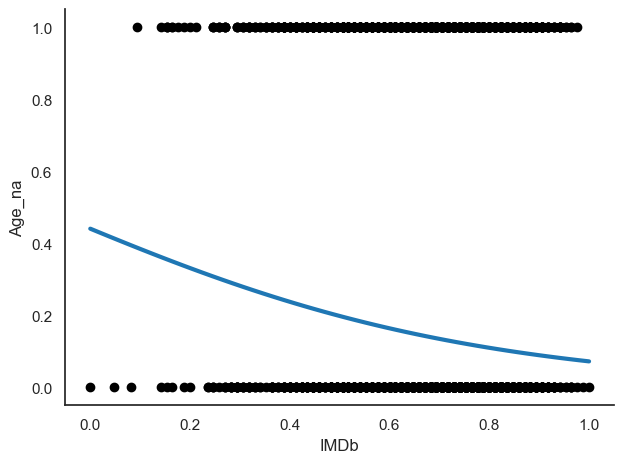

In [30]:
x = tabelle['IMDb']
y = tabelle['Age_na']


def plot_log_reg(x, y, logreg, xmin=None, xmax=None, alpha=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ax.scatter(x, y, color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax)

    loss = scipy.special.expit(X_test * logreg.coef_ + logreg.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)

    ax.set_xlabel('IMDb')
    ax.set_ylabel('Age_na')
    fig.tight_layout()
    sns.despine()
    return fig, ax


plot_log_reg(x, y, logreg, xmin=0, xmax=1);

1## Model Development and Prediction (noch keine Ahnung ab hier) - eingefügt vom oben verlinkten Tutorial

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression from Statistics Packages - ab hier wieder Inhalte von Yves Staudt, nix dran gemacht.

In [32]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.399141
         Iterations 7
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.407    
Dependent Variable:  Age_na            AIC:               3441.8243
Date:                2023-05-04 16:18  BIC:               3486.3791
No. Observations:    4294              Log-Likelihood:    -1713.9  
Df Model:            6                 LL-Null:           -2891.3  
Df Residuals:        4287              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      7.0000                                        
-------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
Year             -2.0891   0.5152  -4.0553 0.0001  -3.0988  -1.0794
IMDb              5.0524   0.2627  19.229

## Logistic Regression with Scikit Learn

In [33]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty=None)

## Prediction

Vorhersage der Gruppe.<

In [34]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1])

Vorhersage der Wahrscheinlichkeit

In [35]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.01406885, 0.98593115],
       [0.81170796, 0.18829204],
       [0.02090493, 0.97909507],
       ...,
       [0.5990822 , 0.4009178 ],
       [0.90366418, 0.09633582],
       [0.02783027, 0.97216973]])

## Model Evaluation

### Confusion Matrix

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[569  99]
 [108 298]]


### Accuracy Score

In [37]:
metrics.accuracy_score(y_test, y_pred)

0.8072625698324022

### Precision and Recall

In [38]:
metrics.precision_score(y_test,y_pred)

0.7506297229219143

In [39]:
metrics.recall_score(y_test,y_pred)

0.7339901477832512

### F1-Score

In [40]:
metrics.f1_score(y_test, y_pred)

0.7422166874221668

### Area Under the Curve

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.79289327748444